In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
file_path = "data/bquxjob_1b6527cd_19277d89f7d.csv"
data = pd.read_csv(file_path)

In [3]:
pivot_data = data.pivot_table(
    index="year", columns="country", values="patent_count", aggfunc="sum"
).fillna(0)
total_patents = pivot_data.sum(axis=1)

In [4]:
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

In [9]:
def plot_plotly_stacked_bar_and_line(pivot_data, absolute_data, title, filename=None):
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    for country in pivot_data.columns:
        fig.add_trace(
            go.Bar(
                x=pivot_data.index,
                y=pivot_data[country],
                name=country,
                text=pivot_data[country].round(1).astype(str) + "%",
                textposition="inside",
                hoverinfo="x+y+text",
            ),
            secondary_y=False,
        )
    fig.add_trace(
        go.Scatter(
            x=absolute_data.index,
            y=absolute_data,
            mode="lines+markers",
            name="Total Patents",
            line=dict(color="red", dash="dot", width=2),
            opacity=0.5,
            hoverinfo="x+y",
        ),
        secondary_y=True,
    )
    fig.update_yaxes(title_text="Percentage (%)", secondary_y=False)
    fig.update_yaxes(title_text="Total Patents", secondary_y=True)
    fig.update_layout(
        title=title,
        barmode="stack",
        xaxis_title="Year",
        legend_title="Legend",
        hovermode="x unified",
    )
    fig.show()
    if filename:
        fig.write_html(filename)

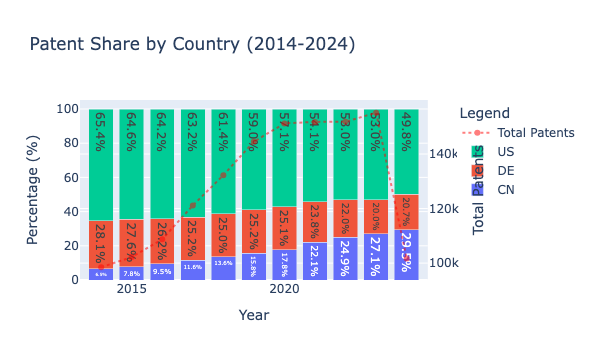

In [10]:
plot_plotly_stacked_bar_and_line(
    pivot_data_percentage, total_patents, "Patent Share by Country (2014-2024)"
)

In [13]:
def plot_per_application_area(data, filename=None):
    application_areas = data["application_area"].unique()
    for app_area in application_areas:
        subset = data[data["application_area"] == app_area]
        pivot_data = subset.pivot_table(
            index="year", columns="country", values="patent_count", aggfunc="sum"
        ).fillna(0)
        total_patents = pivot_data.sum(axis=1)
        pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100
        fig = make_subplots(specs=[[{"secondary_y": True}]])
        for country in pivot_data_percentage.columns:
            fig.add_trace(
                go.Bar(
                    x=pivot_data_percentage.index,
                    y=pivot_data_percentage[country],
                    name=country,
                    text=pivot_data_percentage[country].round(1).astype(str) + "%",
                    textposition="inside",
                    hoverinfo="x+y+text",
                ),
                secondary_y=False,
            )
        fig.add_trace(
            go.Scatter(
                x=total_patents.index,
                y=total_patents,
                mode="lines+markers",
                name="Total Patents",
                line=dict(color="red", dash="dot", width=2),
                opacity=0.5,
                hoverinfo="x+y",
            ),
            secondary_y=True,
        )
        fig.update_yaxes(title_text="Percentage (%)", secondary_y=False)
        fig.update_yaxes(title_text="Total Patents", secondary_y=True)
        fig.update_layout(
            title=f"100% Stacked Patent Share by Country in {app_area} (2014-2024)",
            barmode="stack",
            xaxis_title="Year",
            legend_title="Legend",
            hovermode="x unified",
        )
        fig.show()
        if filename:
            fig.write_html(f"{app_area}_patent_share.html")

In [14]:
plot_per_application_area(data)

In [ ]:
query = f"""
select {columns} from {table} where date = '{date}'
"""